In [1]:
import pandas as pd
import math
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
columns = ['Longitude_new', 'Latitude_new', 'index', 'annual_mean_Qstl_mm', 'annual_25percent_Qstl_mm', 'annual_50percent_Qstl_mm', 'annual_75percent_Qstl_mm']

langtang = pd.read_csv('/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangTL/default_land_cover/default_land_coverlangtang_tl_percentiles_with_coords.csv')[columns]
langtang_gl = pd.read_csv('/Users/varyabazilova/Desktop/paper2/202405_modelruns/1langtangTL/10percent_glacier/langtang_tl_10percent_glacier_percentiles_with_coords.csv')[columns]


ds_nogl = langtang.set_index(['Latitude_new', 'Longitude_new']).to_xarray()

ds = langtang_gl.set_index(['Latitude_new', 'Longitude_new']).to_xarray()



In [3]:


langtang_gl.dtypes


Longitude_new               float64
Latitude_new                float64
index                        object
annual_mean_Qstl_mm         float64
annual_25percent_Qstl_mm    float64
annual_50percent_Qstl_mm    float64
annual_75percent_Qstl_mm    float64
dtype: object

In [4]:
# ds['index'] = ds.index

# Now you can drop the 'index' coordinate
# ds = ds.drop_dims('index')

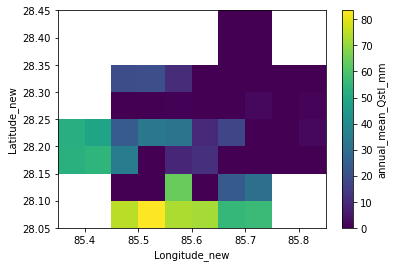

In [12]:
ds.annual_mean_Qstl_mm.plot()

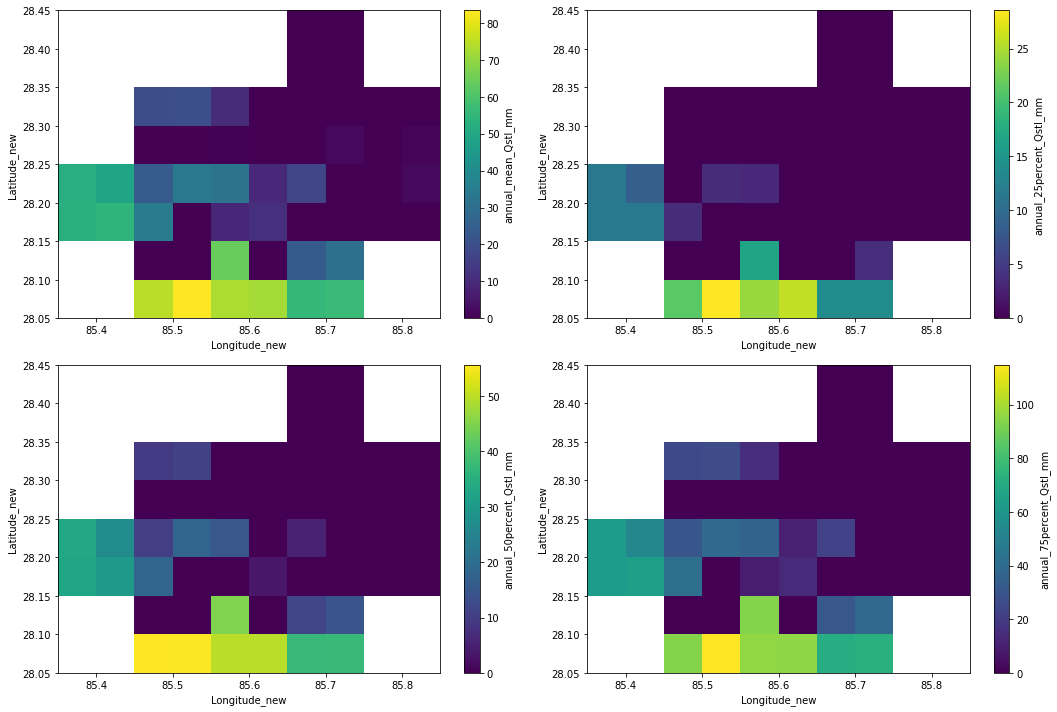

In [13]:
fig = plt.figure(figsize=(15, 10))
mosaic = fig.subplot_mosaic('''
                            ab
                            cd
                            ''')

ds.annual_mean_Qstl_mm.plot(ax=mosaic['a'])
ds.annual_25percent_Qstl_mm.plot(ax=mosaic['b'])
ds.annual_50percent_Qstl_mm.plot(ax=mosaic['c'])
ds.annual_75percent_Qstl_mm.plot(ax=mosaic['d'])

plt.tight_layout()


# plt.savefig('annual_sed_glacier.png')

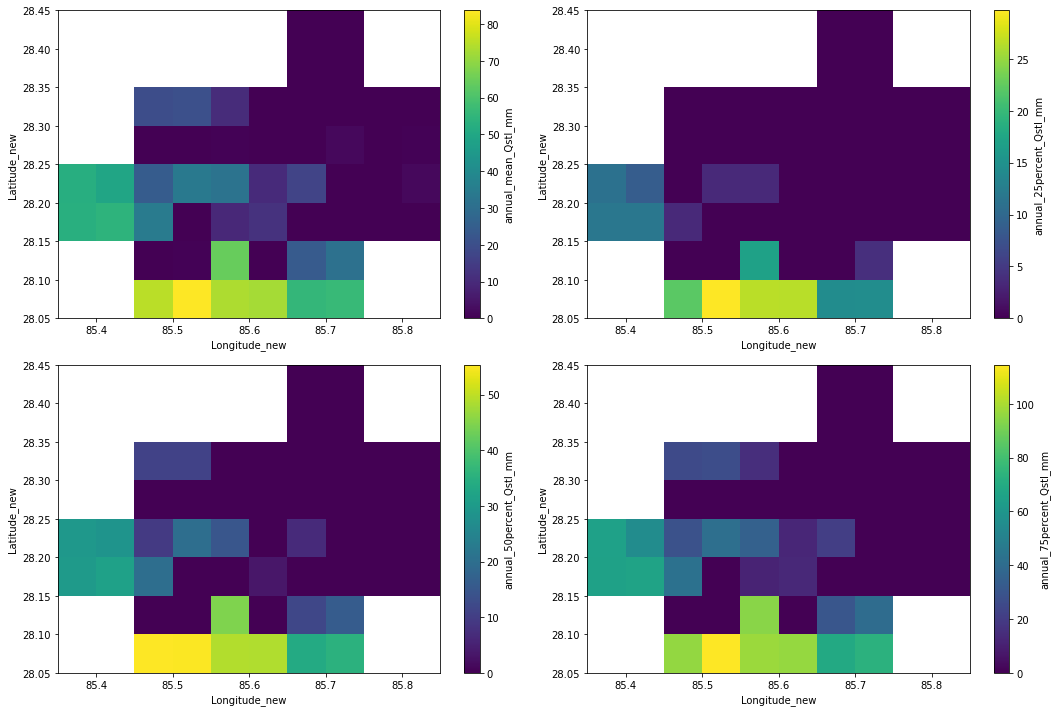

In [14]:
fig = plt.figure(figsize=(15, 10))
mosaic = fig.subplot_mosaic('''
                            ab
                            cd
                            ''')

ds_nogl.annual_mean_Qstl_mm.plot(ax=mosaic['a'])
ds_nogl.annual_25percent_Qstl_mm.plot(ax=mosaic['b'])
ds_nogl.annual_50percent_Qstl_mm.plot(ax=mosaic['c'])
ds_nogl.annual_75percent_Qstl_mm.plot(ax=mosaic['d'])

plt.tight_layout()
# plt.savefig('annual_sed.png')

# elevation and sediment things on one plot

In [20]:
ds

<xarray.Dataset>
Dimensions:                   (Latitude_new: 8, Longitude_new: 10)
Coordinates:
  * Latitude_new              (Latitude_new) float64 28.07 28.12 ... 28.38 28.43
  * Longitude_new             (Longitude_new) float64 85.38 85.42 ... 85.83
Data variables:
    index                     (Latitude_new, Longitude_new) object nan ... nan
    annual_mean_Qstl_mm       (Latitude_new, Longitude_new) float64 nan ... nan
    annual_25percent_Qstl_mm  (Latitude_new, Longitude_new) float64 nan ... nan
    annual_50percent_Qstl_mm  (Latitude_new, Longitude_new) float64 nan ... nan
    annual_75percent_Qstl_mm  (Latitude_new, Longitude_new) float64 nan ... nan

# https://hvplot.holoviz.org/user_guide/Gridded_Data.html

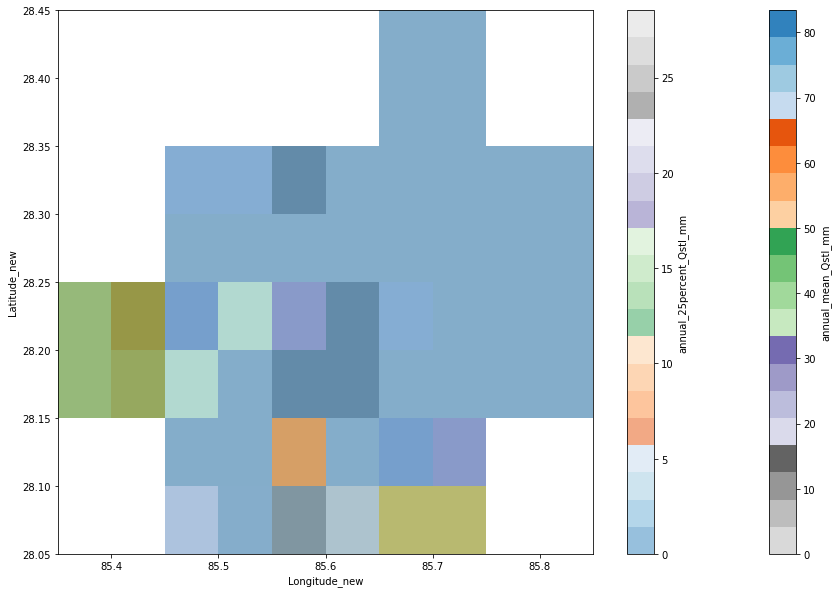

In [36]:
ax, fig = plt.subplots(figsize=(15, 10))

palette = plt.cm.Greys

ds.annual_mean_Qstl_mm.plot(cmap ='tab20c_r')
ds.annual_25percent_Qstl_mm.plot(cmap = 'tab20c', alpha = 0.5)